#### Data Collection

In [1]:
import pandas as pd

In [2]:
FILEPATH = 'World-happiness-report-updated_2024.csv'
data = pd.read_csv(FILEPATH, encoding='ISO-8859-1')

In [3]:
data.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.350           0.451   
1  Afghanistan  2009        4.402               7.509           0.552   
2  Afghanistan  2010        4.758               7.614           0.539   
3  Afghanistan  2011        3.832               7.581           0.521   
4  Afghanistan  2012        3.783               7.661           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.164   
1                              50.8                         0.679       0.187   
2                              51.1                         0.600       0.118   
3                              51.4                         0.496       0.160   
4                              51.7                         0.531       0.234   

   Perceptions of corruption  Positive affect  Negative affect  
0                      0.882            0.414            0.258  
1                      0.850            0.481            0.237  
2                      0.707            0.517            0.275  
3                      0.731            0.480            0.267  
4                      0.776            0.614            0.268

In [4]:
data.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [7]:
data.shape

(2097, 11)

#### Data Preprocessing

In [8]:
## check for value counts
data['Country name'].value_counts()

Country name
Zimbabwe        18
Lithuania       18
Georgia         18
Nicaragua       18
Chile           18
                ..
Belize           2
Saudi Arabia     2
Suriname         1
Guyana           1
Qatar            1
Name: count, Length: 155, dtype: int64

In [9]:
## assign a unique number for each country
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
data['country_encoded'] = le.fit_transform(data['Country name'])

In [11]:
data.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.350           0.451   
1  Afghanistan  2009        4.402               7.509           0.552   
2  Afghanistan  2010        4.758               7.614           0.539   
3  Afghanistan  2011        3.832               7.581           0.521   
4  Afghanistan  2012        3.783               7.661           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.164   
1                              50.8                         0.679       0.187   
2                              51.1                         0.600       0.118   
3                              51.4                         0.496       0.160   
4                              51.7                         0.531       0.234   

   Perceptions of corruption  Positive affect  Negative affect  \
0                      0.882            0.414            0.258   
1                      0.850            0.481            0.237   
2                      0.707            0.517            0.275   
3                      0.731            0.480            0.267   
4                      0.776            0.614            0.268   

   country_encoded  
0                0  
1                0  
2                0  
3                0  
4                0

In [12]:
data.tail()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
2358     Zimbabwe  2019        2.694               7.698           0.759   
2359     Zimbabwe  2020        3.160               7.596           0.717   
2360     Zimbabwe  2021        3.155               7.657           0.685   
2361     Zimbabwe  2022        3.296               7.670           0.666   
2362     Zimbabwe  2023        3.572               7.679           0.694   

      Healthy life expectancy at birth  Freedom to make life choices  \
2358                            53.100                         0.632   
2359                            53.575                         0.643   
2360                            54.050                         0.668   
2361                            54.525                         0.652   
2362                            55.000                         0.735   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  \
2358      -0.051                      0.831            0.658            0.235   
2359       0.003                      0.789            0.661            0.346   
2360      -0.079                      0.757            0.610            0.242   
2361      -0.073                      0.753            0.641            0.191   
2362      -0.069                      0.757            0.610            0.179   

      country_encoded  
2358              154  
2359              154  
2360              154  
2361              154  
2362              154

In [13]:
encoding_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(encoding_mapping)

{'Afghanistan': 0, 'Albania': 1, 'Algeria': 2, 'Angola': 3, 'Argentina': 4, 'Armenia': 5, 'Australia': 6, 'Austria': 7, 'Azerbaijan': 8, 'Bahrain': 9, 'Bangladesh': 10, 'Belarus': 11, 'Belgium': 12, 'Belize': 13, 'Benin': 14, 'Bhutan': 15, 'Bolivia': 16, 'Bosnia and Herzegovina': 17, 'Botswana': 18, 'Brazil': 19, 'Bulgaria': 20, 'Burkina Faso': 21, 'Burundi': 22, 'Cambodia': 23, 'Cameroon': 24, 'Canada': 25, 'Central African Republic': 26, 'Chad': 27, 'Chile': 28, 'Colombia': 29, 'Comoros': 30, 'Congo (Brazzaville)': 31, 'Congo (Kinshasa)': 32, 'Costa Rica': 33, 'Croatia': 34, 'Cyprus': 35, 'Czechia': 36, 'Denmark': 37, 'Djibouti': 38, 'Dominican Republic': 39, 'Ecuador': 40, 'Egypt': 41, 'El Salvador': 42, 'Estonia': 43, 'Eswatini': 44, 'Ethiopia': 45, 'Finland': 46, 'France': 47, 'Gabon': 48, 'Gambia': 49, 'Georgia': 50, 'Germany': 51, 'Ghana': 52, 'Greece': 53, 'Guatemala': 54, 'Guinea': 55, 'Guyana': 56, 'Haiti': 57, 'Honduras': 58, 'Hungary': 59, 'Iceland': 60, 'India': 61, 'Indon

In [14]:
data['OverallRank'] = data.index+1

In [15]:
data.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.350           0.451   
1  Afghanistan  2009        4.402               7.509           0.552   
2  Afghanistan  2010        4.758               7.614           0.539   
3  Afghanistan  2011        3.832               7.581           0.521   
4  Afghanistan  2012        3.783               7.661           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.164   
1                              50.8                         0.679       0.187   
2                              51.1                         0.600       0.118   
3                              51.4                         0.496       0.160   
4                              51.7                         0.531       0.234   

   Perceptions of corruption  Positive affect  Negative affect  \
0                      0.882            0.414            0.258   
1                      0.850            0.481            0.237   
2                      0.707            0.517            0.275   
3                      0.731            0.480            0.267   
4                      0.776            0.614            0.268   

   country_encoded  OverallRank  
0                0            1  
1                0            2  
2                0            3  
3                0            4  
4                0            5

In [16]:
data.rename(columns={
    'Life Ladder': 'score',
    'country_encoded': 'country',
    'Log GDP per capita': 'gdp',
    'Social support': 'support',
    'Healthy life expectancy at birth': 'healthy', 
    'Freedom to make life choices': 'freedom',
    'Generosity': 'generosity',
    'Positive affect': 'positive_emotions_experienced',
    'Negative affect': 'negative_emotions_experienced',
    'Perceptions of corruption': 'corruption'}, inplace=True)

In [17]:
data.head()

Country name  year  score    gdp  support  healthy  freedom  generosity  \
0  Afghanistan  2008  3.724  7.350    0.451     50.5    0.718       0.164   
1  Afghanistan  2009  4.402  7.509    0.552     50.8    0.679       0.187   
2  Afghanistan  2010  4.758  7.614    0.539     51.1    0.600       0.118   
3  Afghanistan  2011  3.832  7.581    0.521     51.4    0.496       0.160   
4  Afghanistan  2012  3.783  7.661    0.521     51.7    0.531       0.234   

   corruption  positive_emotions_experienced  negative_emotions_experienced  \
0       0.882                          0.414                          0.258   
1       0.850                          0.481                          0.237   
2       0.707                          0.517                          0.275   
3       0.731                          0.480                          0.267   
4       0.776                          0.614                          0.268   

   country  OverallRank  
0        0            1  
1        0            2  
2        0            3  
3        0            4  
4        0            5

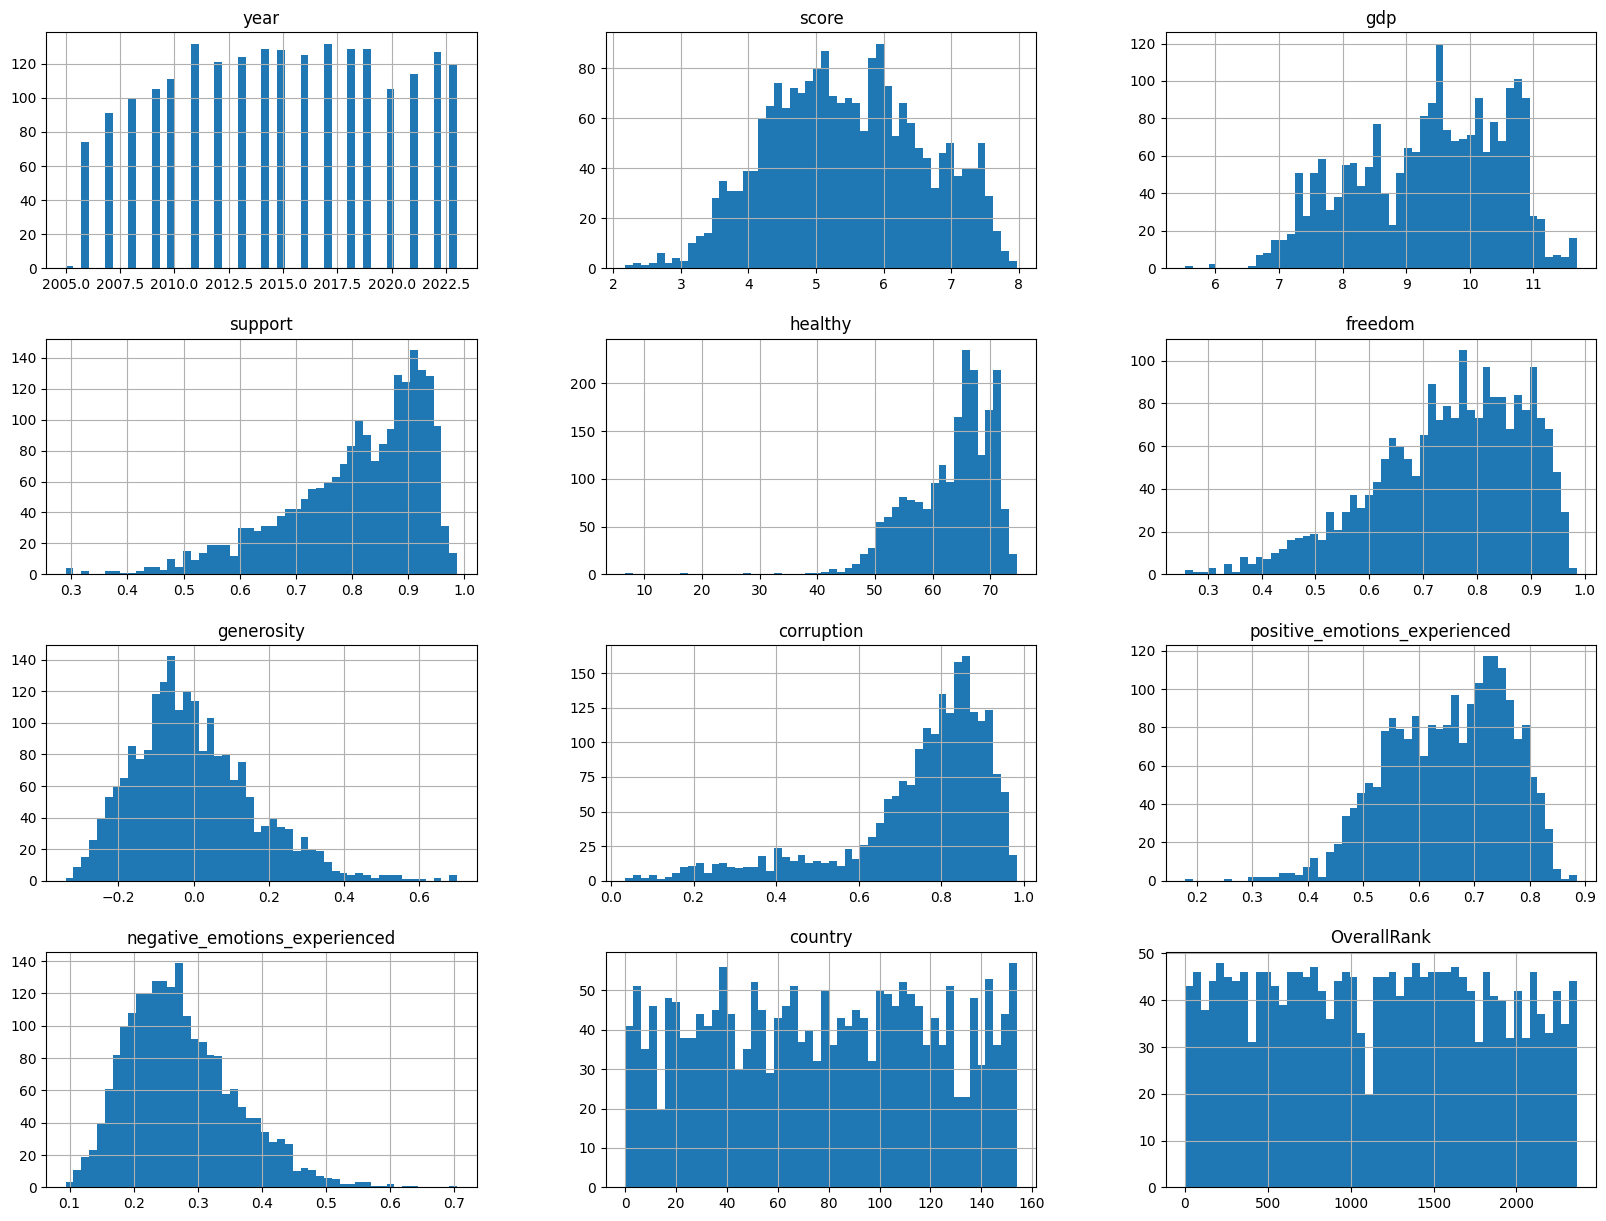

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [19]:
import seaborn as sns

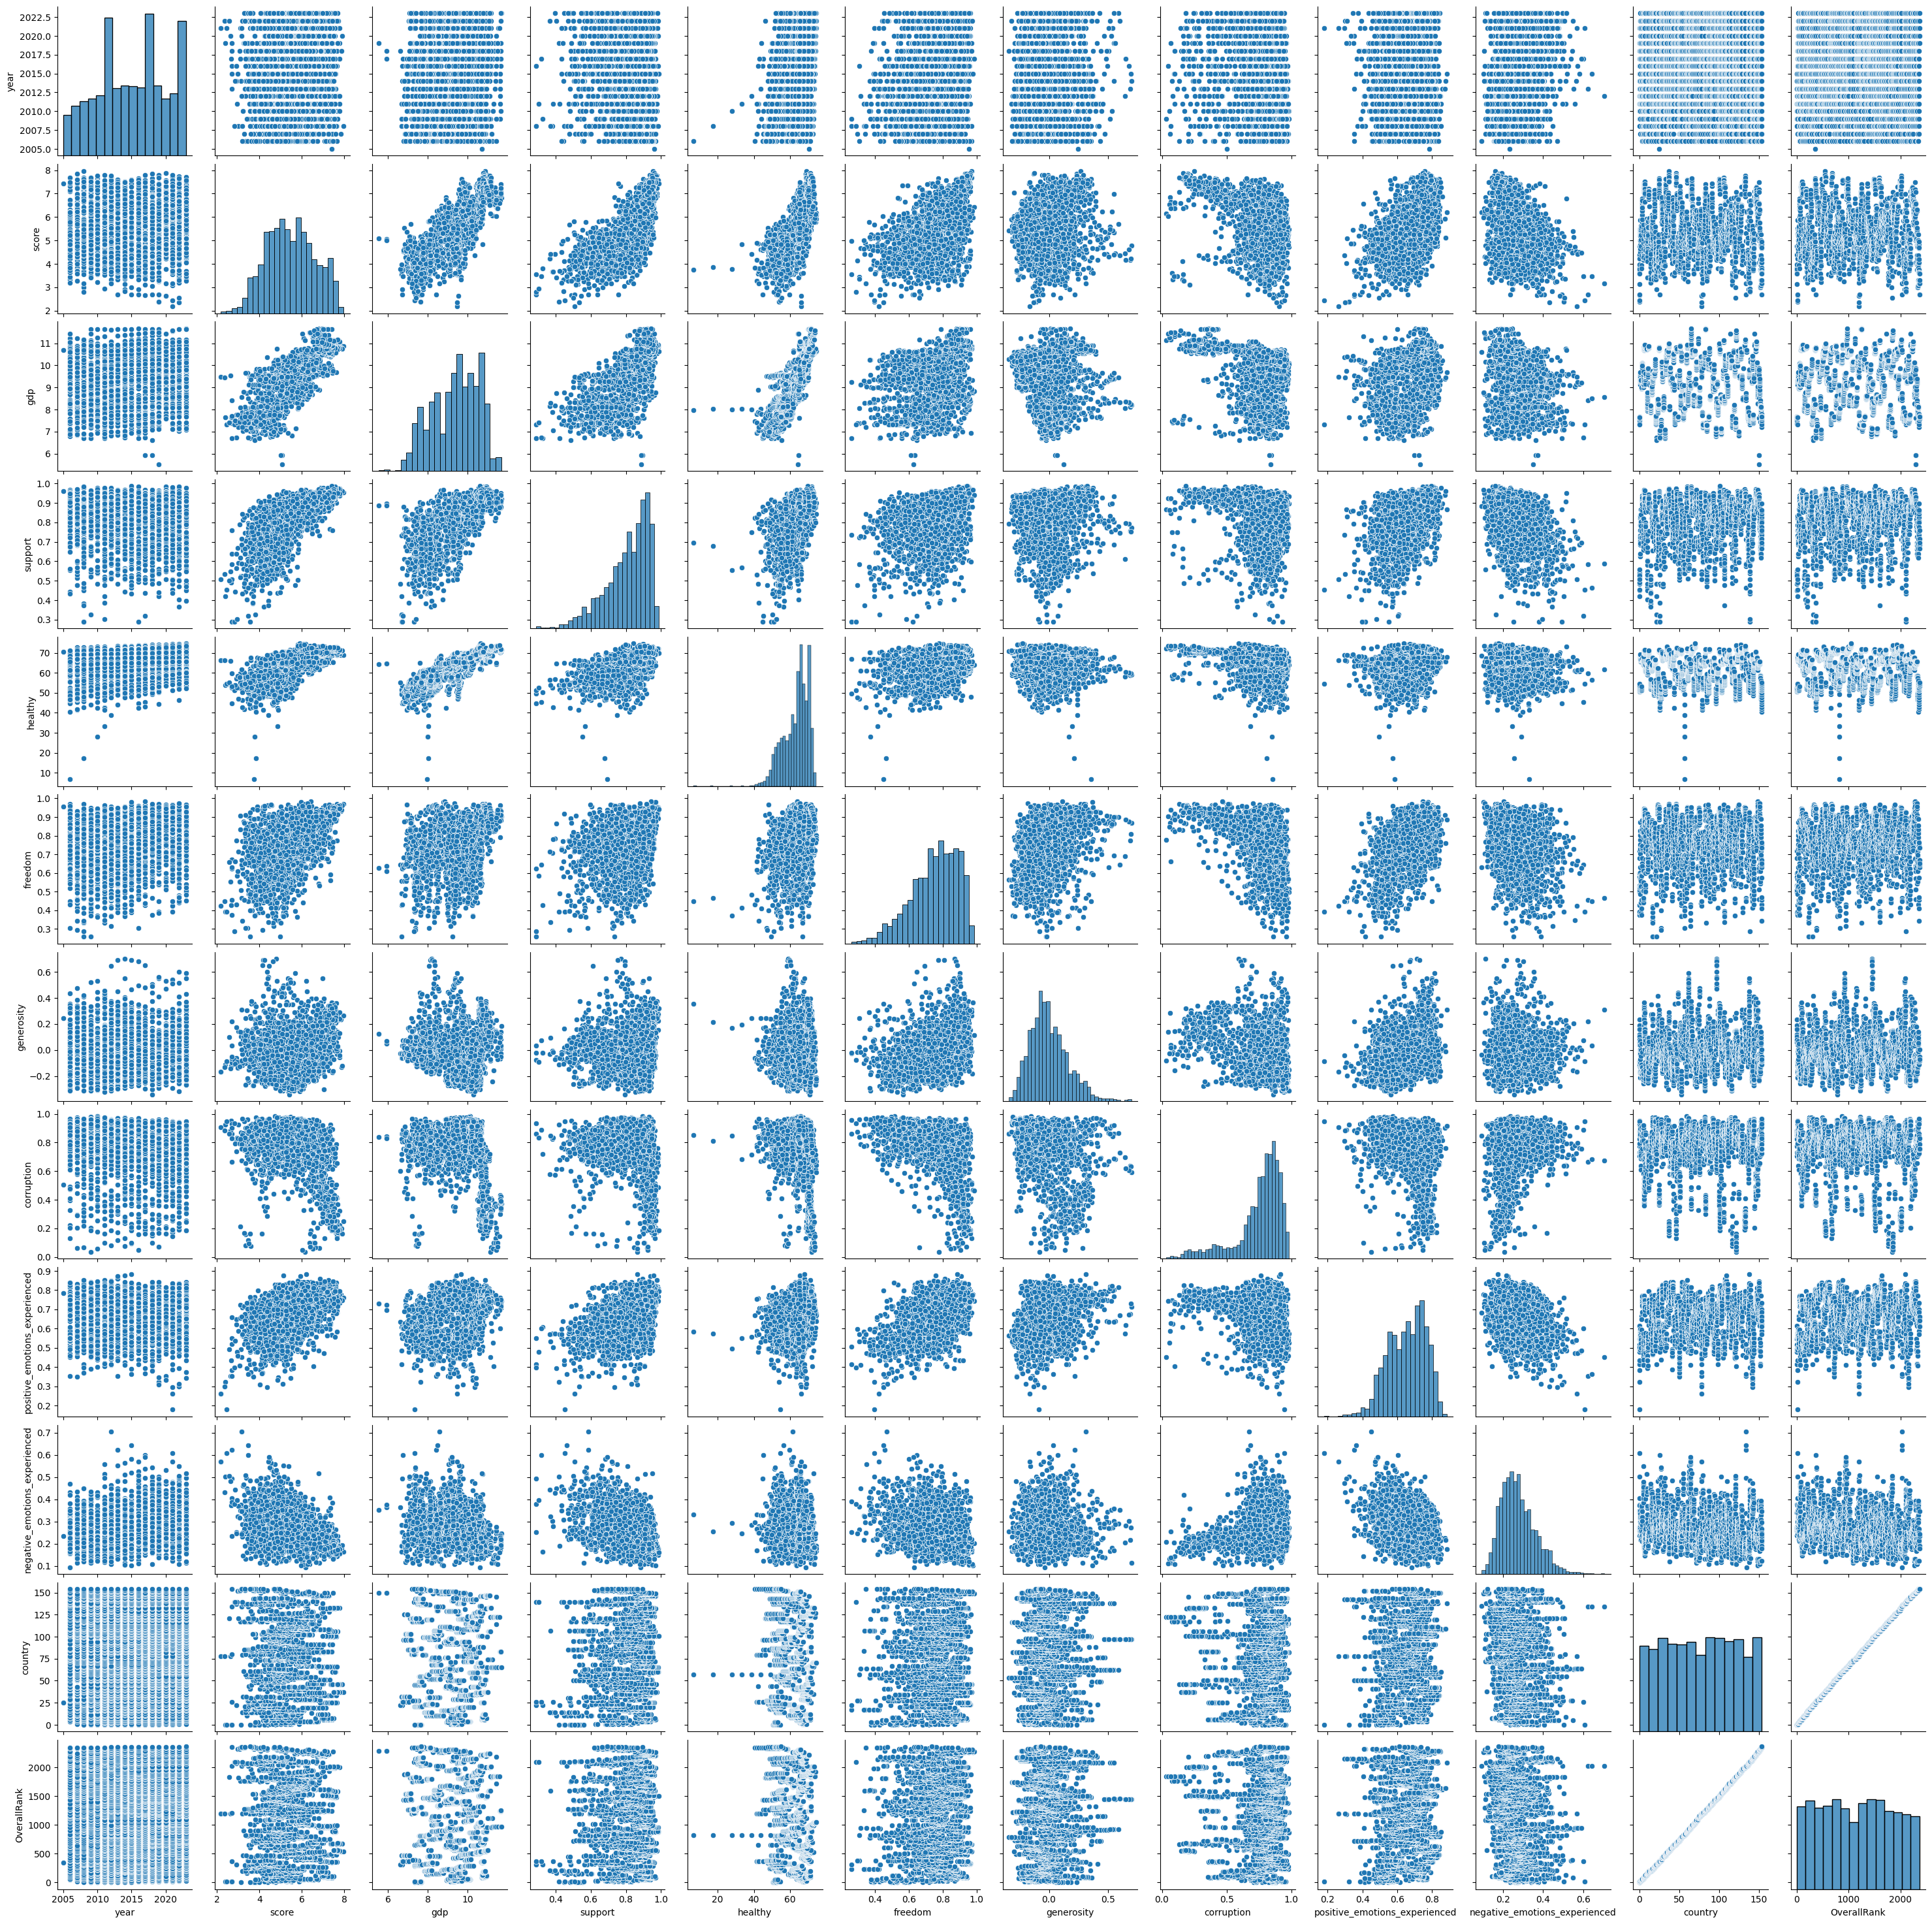

In [20]:
sns.pairplot(data)

In [21]:
data.head()

Country name  year  score    gdp  support  healthy  freedom  generosity  \
0  Afghanistan  2008  3.724  7.350    0.451     50.5    0.718       0.164   
1  Afghanistan  2009  4.402  7.509    0.552     50.8    0.679       0.187   
2  Afghanistan  2010  4.758  7.614    0.539     51.1    0.600       0.118   
3  Afghanistan  2011  3.832  7.581    0.521     51.4    0.496       0.160   
4  Afghanistan  2012  3.783  7.661    0.521     51.7    0.531       0.234   

   corruption  positive_emotions_experienced  negative_emotions_experienced  \
0       0.882                          0.414                          0.258   
1       0.850                          0.481                          0.237   
2       0.707                          0.517                          0.275   
3       0.731                          0.480                          0.267   
4       0.776                          0.614                          0.268   

   country  OverallRank  
0        0            1  
1        0            2  
2        0            3  
3        0            4  
4        0            5

In [22]:
data.drop(columns=['Country name'], inplace=True)

In [24]:
data.head()

year  score    gdp  support  healthy  freedom  generosity  corruption  \
0  2008  3.724  7.350    0.451     50.5    0.718       0.164       0.882   
1  2009  4.402  7.509    0.552     50.8    0.679       0.187       0.850   
2  2010  4.758  7.614    0.539     51.1    0.600       0.118       0.707   
3  2011  3.832  7.581    0.521     51.4    0.496       0.160       0.731   
4  2012  3.783  7.661    0.521     51.7    0.531       0.234       0.776   

   positive_emotions_experienced  negative_emotions_experienced  country  \
0                          0.414                          0.258        0   
1                          0.481                          0.237        0   
2                          0.517                          0.275        0   
3                          0.480                          0.267        0   
4                          0.614                          0.268        0   

   OverallRank  
0            1  
1            2  
2            3  
3            4  
4            5

<Axes: >

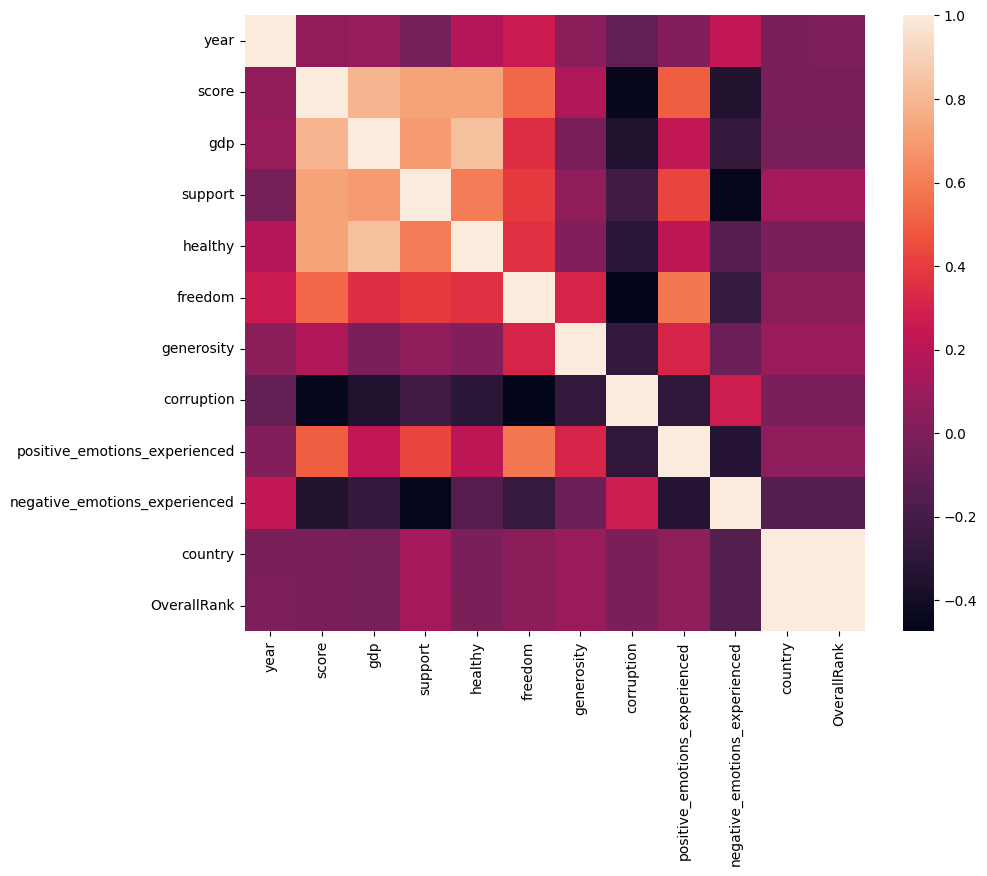

In [23]:
plt.subplots(figsize=(10,8))
sns.heatmap(data.corr())

In [25]:
corr_matrix = data.corr()

In [26]:
corr_matrix['score'].sort_values(ascending=False)

score                            1.000000
gdp                              0.787119
healthy                          0.725240
support                          0.724926
freedom                          0.528130
positive_emotions_experienced    0.502195
generosity                       0.162558
year                             0.066765
OverallRank                     -0.021756
country                         -0.021841
negative_emotions_experienced   -0.345540
corruption                      -0.451575
Name: score, dtype: float64

In [27]:
data.head()

year  score    gdp  support  healthy  freedom  generosity  corruption  \
0  2008  3.724  7.350    0.451     50.5    0.718       0.164       0.882   
1  2009  4.402  7.509    0.552     50.8    0.679       0.187       0.850   
2  2010  4.758  7.614    0.539     51.1    0.600       0.118       0.707   
3  2011  3.832  7.581    0.521     51.4    0.496       0.160       0.731   
4  2012  3.783  7.661    0.521     51.7    0.531       0.234       0.776   

   positive_emotions_experienced  negative_emotions_experienced  country  \
0                          0.414                          0.258        0   
1                          0.481                          0.237        0   
2                          0.517                          0.275        0   
3                          0.480                          0.267        0   
4                          0.614                          0.268        0   

   OverallRank  
0            1  
1            2  
2            3  
3            4  
4            5

array([[<Axes: xlabel='score', ylabel='score'>,
        <Axes: xlabel='gdp', ylabel='score'>,
        <Axes: xlabel='healthy', ylabel='score'>,
        <Axes: xlabel='support', ylabel='score'>,
        <Axes: xlabel='freedom', ylabel='score'>,
        <Axes: xlabel='positive_emotions_experienced', ylabel='score'>,
        <Axes: xlabel='negative_emotions_experienced', ylabel='score'>,
        <Axes: xlabel='corruption', ylabel='score'>],
       [<Axes: xlabel='score', ylabel='gdp'>,
        <Axes: xlabel='gdp', ylabel='gdp'>,
        <Axes: xlabel='healthy', ylabel='gdp'>,
        <Axes: xlabel='support', ylabel='gdp'>,
        <Axes: xlabel='freedom', ylabel='gdp'>,
        <Axes: xlabel='positive_emotions_experienced', ylabel='gdp'>,
        <Axes: xlabel='negative_emotions_experienced', ylabel='gdp'>,
        <Axes: xlabel='corruption', ylabel='gdp'>],
       [<Axes: xlabel='score', ylabel='healthy'>,
        <Axes: xlabel='gdp', ylabel='healthy'>,
        <Axes: xlabel='healthy', y

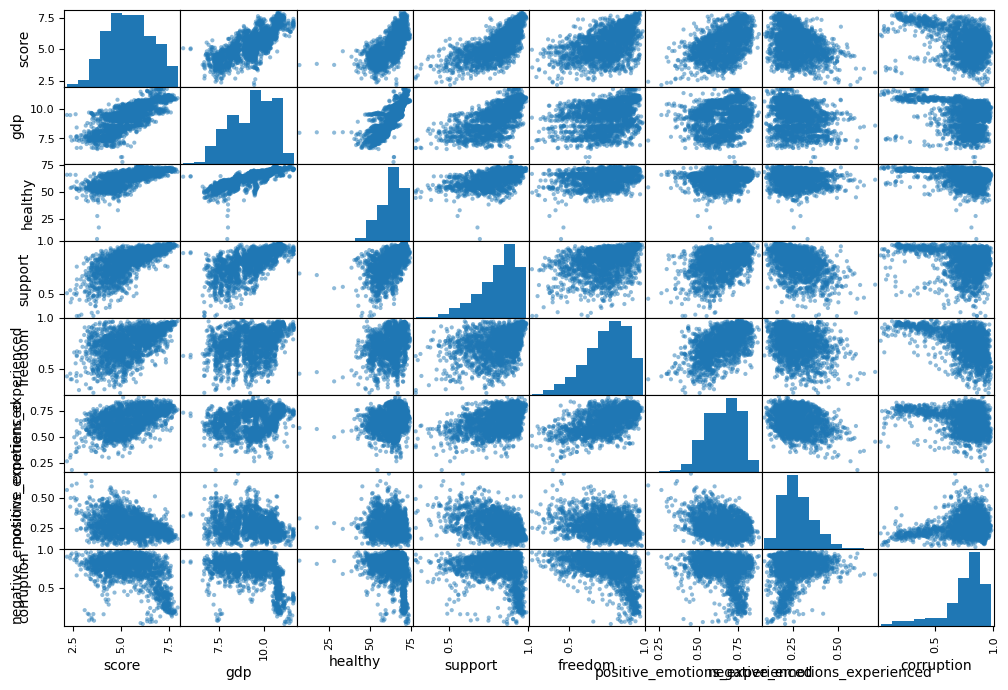

In [28]:
from pandas.plotting import scatter_matrix

attributes = ['score', 'gdp', 'healthy', 'support', 'freedom', 'positive_emotions_experienced', 'negative_emotions_experienced', 'corruption']
scatter_matrix(data[attributes], figsize=(12, 8))

#### Check for Outliers

In [85]:
outlier_data  = data['corruption']

In [86]:
Q1 = outlier_data.quantile(0.25)
Q3 = outlier_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print(f'lowerbound: {str(lower_bound)}')
print(f'upperbound: {str(upper_bound)}')
print(f'Q1: {Q1}')
print(f'Q3: {Q3}')

lowerbound: 0.4254999999999999
upperbound: 1.1335000000000002
Q1: 0.691
Q3: 0.868


In [88]:
outliers_vector = (outlier_data < (lower_bound)) | (outlier_data > (upper_bound))
outliers_vector

0       False
1       False
2       False
3       False
4       False
        ...  
2358    False
2359    False
2360    False
2361    False
2362    False
Name: corruption, Length: 2097, dtype: bool

In [90]:
outliers_vector.value_counts()

corruption
False    1913
True      184
Name: count, dtype: int64

In [91]:
outliers_vector = data[outliers_vector]
outliers_vector.index.values

array([  84,   85,   86,   89,   90,   91,   92,  351,  352,  353,  356,
        359,  360,  361,  364,  540,  541,  542,  543,  544,  545,  546,
        547,  548,  549,  550,  551,  552,  553,  554,  555,  556,  646,
        648,  649,  665,  666,  667,  668,  669,  670,  671,  672,  673,
        674,  675,  676,  677,  678,  679,  680,  722,  723,  724,  725,
        744,  746,  749,  750,  751,  961,  962,  963,  964,  965,  966,
        967,  968,  969,  970, 1117, 1238, 1239, 1240, 1241, 1242, 1243,
       1244, 1245, 1246, 1247, 1248, 1249, 1484, 1485, 1486, 1490, 1492,
       1493, 1494, 1495, 1496, 1498, 1499, 1500, 1501, 1502, 1503, 1504,
       1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515,
       1582, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593,
       1594, 1717, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766,
       1767, 1768, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845,
       1846, 1847, 1848, 1849, 1884, 1988, 1989, 19

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [30]:
X = data[['gdp', 'healthy', 'support', 'freedom','corruption']]

In [31]:
y = data.score

#### Split Dataset

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

#### Model Building

In [39]:
from sklearn.linear_model import LinearRegression

lR = LinearRegression()

In [40]:
lR.fit(X_train, y_train)

LinearRegression()

In [98]:
print(f"Intercept: {lR.intercept_}")
print(f"Coefficient: {lR.coef_[0]}")
print(f'RScore:{lR.score(X_train,y_train)}')

Intercept: -0.003533666463168366
Coefficient: 0.4002313146268432
RScore:0.776588408121079


In [42]:
y_pred = lR.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared Error: {mse:.2f}')

Mean squared Error: 0.23


In [44]:
from sklearn.tree import DecisionTreeRegressor

dT = DecisionTreeRegressor()

In [45]:
dT.fit(X_train, y_train)

DecisionTreeRegressor()

In [46]:
y_pred = dT.predict(X_test)

In [47]:
tree_mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared Error: {tree_mse:.2f}')

Mean squared Error: 0.21


In [94]:
dT.predict([[7.350, 50.5, 0.451, 0.718, 0.414, 0.1258, 0.882]])

/Users/rev.dr.sylviablessings/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([1.26464368])

In [48]:
## Cross Validation
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dT, X_train, y_train,
                        scoring="neg_mean_squared_error", cv=10)
tree_mse_scores = np.sqrt(-scores)

#### Model: Random Forest Regressor

In [104]:
from sklearn.ensemble import RandomForestRegressor
rF = RandomForestRegressor()

In [105]:
rF.fit(X_train, y_train)

RandomForestRegressor()

In [106]:
rF.score(X_test, y_test)

0.8419841154736292

In [107]:
y_pred = rF.predict(X_test)

In [108]:
rF_mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared Error: {rF_mse:.2f}')

Mean squared Error: 0.21


#### Predictions

In [109]:
X

gdp  healthy  support  freedom  corruption
0     7.350   50.500    0.451    0.718       0.882
1     7.509   50.800    0.552    0.679       0.850
2     7.614   51.100    0.539    0.600       0.707
3     7.581   51.400    0.521    0.496       0.731
4     7.661   51.700    0.521    0.531       0.776
...     ...      ...      ...      ...         ...
2358  7.698   53.100    0.759    0.632       0.831
2359  7.596   53.575    0.717    0.643       0.789
2360  7.657   54.050    0.685    0.668       0.757
2361  7.670   54.525    0.666    0.652       0.753
2362  7.679   55.000    0.694    0.735       0.757

[2097 rows x 5 columns]

In [110]:
y

0       3.724
1       4.402
2       4.758
3       3.832
4       3.783
        ...  
2358    2.694
2359    3.160
2360    3.155
2361    3.296
2362    3.572
Name: score, Length: 2097, dtype: float64

In [ ]:
rF.predict([[7.350, 50.5, 0.451, 0.718,  0.882]])

/Users/rev.dr.sylviablessings/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3.61993])

In [112]:
rF.predict([[7.679, 55.0, 0.694, 0.735, 0.757]])

/Users/rev.dr.sylviablessings/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([4.56299])

#### Hyperparameter Tuning to Improve the Model

In [113]:
from sklearn.model_selection import GridSearchCV

In [119]:
param_grid = {
    'n_estimators' : [100, 200, 300],
    'max_depth': [3, 6, 9, 12]
}



In [120]:
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2')

In [121]:
model_grid = grid.fit(X_train, y_train)

In [123]:
print(f'Best Hyperparameters: {model_grid.best_params_}, Score: {model_grid.best_score_}')

Best Hyperparameters: {'max_depth': 12, 'n_estimators': 200}, Score: 0.8297764152221916


#### Save Model

In [124]:
import pickle

In [129]:
pickle.dump(rF, open('models/rF_v1', 'wb'))

In [130]:
rF_v1 = pickle.load(open('models/rF_v1', 'rb'))

In [131]:
rF_v1.predict([[7.350, 50.5, 0.451, 0.718,  0.882]])

/Users/rev.dr.sylviablessings/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3.61993])